In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
df = pd.read_csv("../3.8 Visualization II/world_data_full_apply_nulos.csv") 


In [4]:
df.head()

,Unnamed: 0,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [11]:
order_continents = df['continent'].value_counts()
order_continents


continent
Africa             53
Europe             47
Asia               45
Central America    20
Oceania            14
South America      13
North America       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Recuento paises por continente')

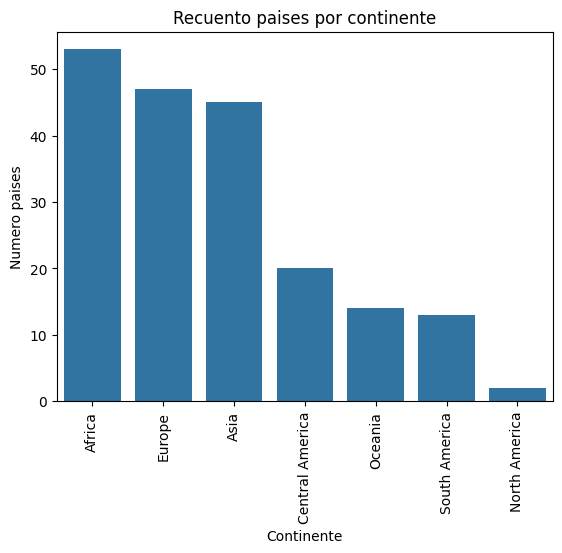

In [10]:
order_continents = df['continent'].value_counts().index
order_continents

sns.countplot(x='continent', data=df, order=order_continents)
plt.xticks(rotation=90)
plt.xlabel("Continente")
plt.ylabel("Numero paises")
plt.title('Recuento paises por continente')

In [14]:
df_continente = df.groupby('continent')["country"].count().reset_index()
df_continente

,continent,country
0,Africa,53
1,Asia,45
2,Central America,20
3,Europe,47
4,North America,2
5,Oceania,14
6,South America,13


Text(0.5, 1.0, 'Porcentaje de paises por continente')

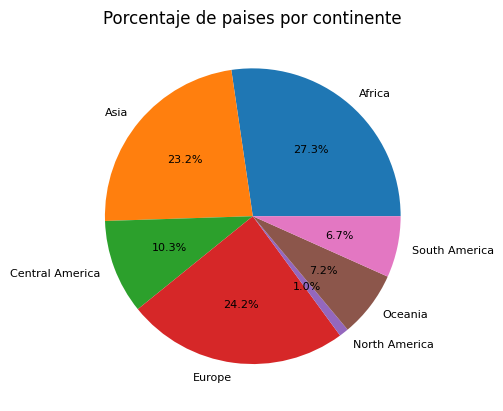

In [16]:
plt.pie("country", labels="continent", data=df_continente, textprops={'fontsize': 8}, autopct='%1.1f%%')
plt.title('Porcentaje de paises por continente')


¿Cuáles son los 10 países con la mayor área forestal?

In [22]:
# Sort the DataFrame by 'forested_area' in descending order
top_10_countries = df.sort_values(by='forested_area', ascending=False).head(10)

# Show the country name and forested area
df_forested = top_10_countries[['country', 'forested_area']]

df_forested


,country,forested_area
167,Suriname,98.3
111,Federated States of Micronesia,91.9
61,Gabon,90.0
154,Seychelles,88.4
132,Palau,87.6
71,Guyana,83.9
92,Laos,82.1
159,Solomon Islands,77.9
135,Papua New Guinea,74.1
59,Finland,73.1


Text(0.5, 1.0, '10 Paises con mas area forestal')

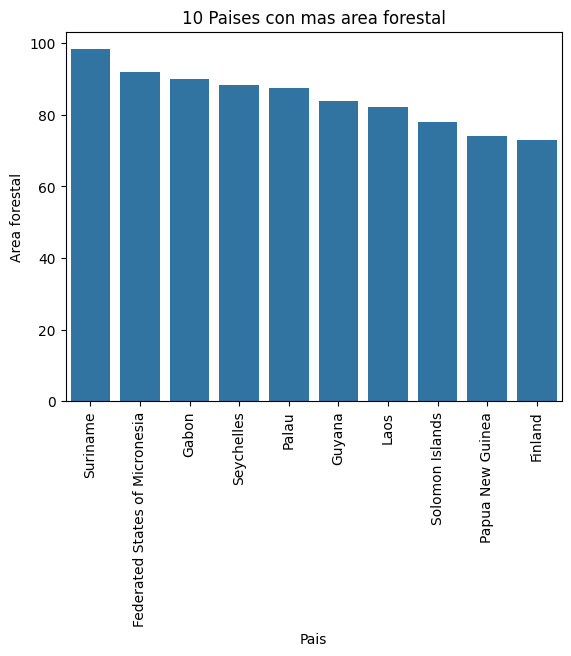

In [25]:
sns.barplot(x='country', y='forested_area', data=df_forested)
plt.xticks(rotation=90)
plt.xlabel("Pais")
plt.ylabel("Area forestal")
plt.title('10 Paises con mas area forestal')


¿Cómo se distribuye la densidad de población entre los países?

Text(0.5, 1.0, 'Distribucion de densidad de poblacion')

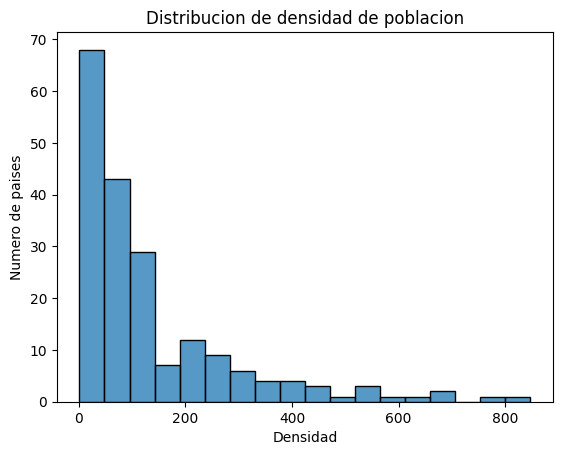

In [30]:
sns.histplot(x='density', data=df)
plt.xlabel("Densidad")
plt.ylabel("Numero de paises")
plt.title('Distribucion de densidad de poblacion')

¿Existe una relación entre el PIB y la tasa de desempleo de los países?

*PIB en español es GDP en inglés

In [38]:
df['unemployment_rate'].unique()

array([11.12, 12.33, 11.7 ,   nan,  6.89,  9.79, 16.99,  5.27,  4.67,
        5.51, 10.36,  0.71,  4.19, 10.33,  4.59,  5.59,  6.41,  2.23,
        2.34,  3.5 , 18.42, 18.19, 12.08,  9.12,  4.34,  6.26,  1.43,
        3.32, 12.25,  0.68,  3.38,  5.56,  3.68,  1.89,  7.09,  4.32,
        9.71,  9.47, 11.85,  6.93,  1.64,  7.27,  1.93,  4.24,  4.91,
       10.3 ,  5.84,  3.97, 10.76,  4.11,  6.43,  5.14,  5.11,  2.08,
        4.1 ,  6.59,  8.43, 20.  ,  9.06, 14.4 ,  3.04,  4.33, 17.24,
        2.46,  4.3 ,  2.47, 13.78,  5.39,  3.4 ,  2.84,  5.36,  4.69,
       11.38, 12.82,  4.93,  3.86,  9.89,  8.  ,  2.29, 14.72,  2.64,
        2.18,  6.33,  0.63,  6.52,  6.23, 23.41,  2.81, 18.56,  6.35,
        1.76,  5.65,  6.14,  7.22,  3.47,  9.55,  6.67,  3.42,  5.47,
        6.01, 14.88,  9.02,  3.24,  1.58, 20.27,  1.41,  3.2 ,  4.07,
        6.84,  0.47,  8.1 ,  2.74,  3.35,  2.67,  4.45,  3.9 ,  4.81,
        3.31,  2.15,  0.09,  3.98,  1.03, 20.71, 18.88,  8.36, 13.37,
        5.93,  6.6 ,

In [39]:
df['gdp'].unique()

array([1.91013538e+10, 1.52780774e+10, 1.69988236e+11, 3.15405799e+09,
       9.46354159e+10, 1.72775926e+09, 4.49663447e+11, 1.36728022e+10,
       1.39268059e+12, 4.46314740e+11, 3.92070000e+10, 1.28270000e+10,
       3.85740691e+10, 3.02571254e+11, 5.20900000e+09, 6.30804570e+10,
       5.29606710e+11, 1.87961360e+09, 1.43907091e+10, 2.44667410e+09,
       4.08953229e+10, 2.00478484e+10, 1.83405108e+10, 1.83975804e+12,
       1.34694229e+10, 8.60000000e+10, 1.57458102e+10, 3.01233488e+09,
       5.87922056e+10, 1.98184574e+09, 2.70893898e+10, 3.87604670e+10,
       1.73642563e+12, 2.22030737e+09, 1.13149513e+10, 2.82318160e+11,
       1.99100000e+13, 3.23802808e+11, 1.18572868e+09, 1.08205911e+10,
       6.17739442e+10, 6.04155530e+10, 1.00023000e+11, 2.45646479e+10,
       2.46489245e+11, 4.73196242e+10, 3.48078018e+11, 3.31871636e+09,
       5.96033333e+08, 8.89412983e+10, 1.07435665e+11, 3.03175128e+11,
       2.70226400e+10, 1.10267749e+10, 2.06500163e+09, 3.13869500e+10,
      

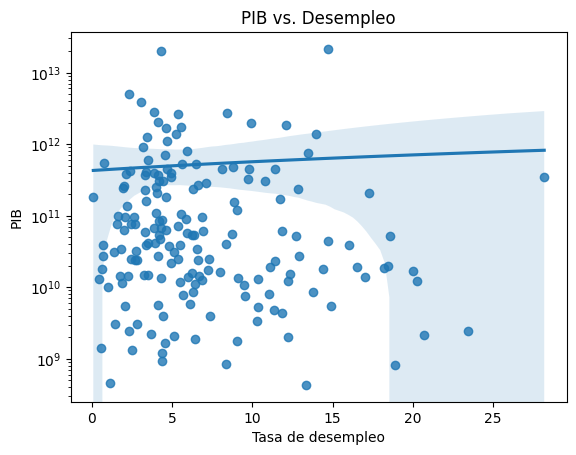

In [46]:
sns.regplot(y="gdp", x="unemployment_rate", data=df)
plt.ylabel("PIB")
plt.xlabel("Tasa de desempleo")
plt.title('PIB vs. Desempleo')
plt.yscale("log")

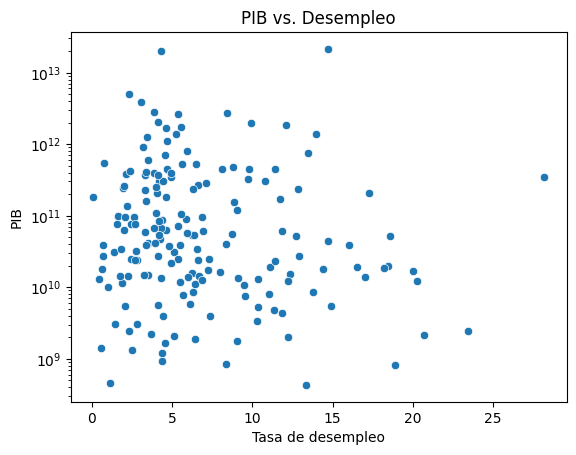

In [45]:
sns.scatterplot(y="gdp", x="unemployment_rate", data=df)
plt.ylabel("PIB")
plt.xlabel("Tasa de desempleo")
plt.title('PIB vs. Desempleo')
plt.yscale("log")

¿Cómo se relacionan la tasa de mortalidad infantil y la esperanza de vida?

Text(0.5, 1.0, 'Mortalidad Infantil vs. Esperanza de Vida ')

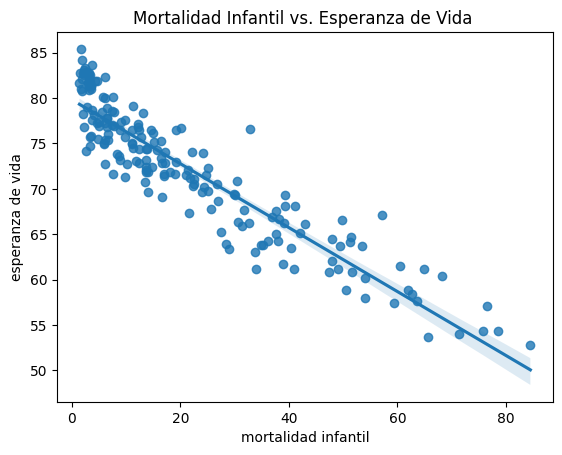

In [47]:
sns.regplot(x="infant_mortality", y="life_expectancy", data=df)
plt.xlabel("mortalidad infantil")
plt.ylabel("esperanza de vida")
plt.title('Mortalidad Infantil vs. Esperanza de Vida ')
